In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def returnPoint(self):
        return (self.x, self.y)     

In [3]:
class InnerNode:
    def __init__(self, idd = None, f = None, lson = None, rson = None, maxY = None, Q = None, B = None):
        self.idd = idd #Debugging
        self.f = f #pointer to father
        self.lson = lson #pointer to left son
        self.rson = rson #pointer to right son
        self.maxY = maxY #largest y-value in subtree of lson
        self.Q = Q #segment of Q_a that did not contribute to Q_f
        self.B = B #number of points of Q_a that contribute to Q_f
    
    def printData(self):
        printID = self.idd
        if self.f:
            printF = self.f
        else:
            printF = "NONE"
        
        if(type(self.lson) is list):
            printLson = "["
            for i in range(len(self.lson)-1):
                printLson += "{},".format(self.lson[i].y)
            printLson += "{}".format(self.lson[len(self.lson)-1].y)
            printLson += "]"
        else:
            printLson = self.lson.y
        if(type(self.rson) is list):
            printRson = "["
            for i in range(len(self.rson)-1):
                printRson += "{},".format(self.rson[i].y)
            printRson += "{}".format(self.rson[len(self.rson)-1].y)
            printRson += "]"
        else:
            printRson = self.rson.y
        printMaxY = self.maxY
        if self.Q:
            printQ = "["
            for i in range(len(self.Q)-1):
                printQ += "{},".format(self.Q[i].y)
            printQ += "{}".format(self.Q[len(self.Q)-1].y)
            printQ += "]"
        else:
            printQ = "NONE"
        if self.B:
            printB = self.B
        else:
            printB = "NONE"
            
        print("id: {}, f: {}, lson: {}, rson: {}, maxY: {}, Q: {}, B: {}".format(printID, printF, printLson, printRson, printMaxY, printQ, printB))
    

In [4]:
import math
def create_points_circle(r, n):
    pi = math.pi
    points = []
    for i in range(n):
        x = math.cos(2*pi*(np.random.rand()*max)/n*i)*r *(np.random.rand())
        y = math.sin(2*pi*(np.random.rand()*max)/n*i)*r *(np.random.rand())
        p = Point(x+r, y+r)
        points.append(p)
    return points

In [5]:
import math
def create_points_arc(r, n, offsetY=0):
    pi = math.pi
    n = n * 2 
    points = []
    for i in range(n):
        x = math.cos(2*pi/n*i)*r
        y = math.sin(2*pi/n*i)*r
        if(x <= 0):
            x += r
            y += r + offsetY
            x = math.ceil(x)
            y = math.ceil(y)
            p = Point(x, y)
            points.append(p)
    return points

In [6]:
def plotPoints(points, Y0, showAngles=False, hull=None):
    n = len(points)
    if(showAngles == True):
        point1 = [Y0.x, Y0.y]
        for i in range(n):
            point2 = [points[i].x,points[i].y]
            x_values = [point1[0], point2[0]]
            y_values = [point1[1], point2[1]]
            plt.plot(x_values, y_values, 'b-', linewidth=0.1)
            plt.plot(point2[0], point2[1], 'b.')
    
    if hull:
        x0 = hull[0].x
        y0 = hull[0].y
        
        for p in hull[1:]:
            x1 = p.x
            y1 = p.y
            plt.plot([x0, x1], [y0, y1])
            x0, y0 = x1, y1
        
    
    for i in range(n):
        plt.plot(points[i].x, points[i].y, "b.")
    plt.plot(Y0.x, Y0.y, "go")
    plt.show()

In [7]:
def printList(points):
    for i in range(len(points)):
        print(points[i].x, points[i].y)

In [8]:
def isBetween(a, b, c):
    epsilon = 0.1
    crossproduct = (c.y - a.y) * (b.x - a.x) - (c.x - a.x) * (b.y - a.y)

    # compare versus epsilon for floating point values, or != 0 if using integers
    if abs(crossproduct) > epsilon:
        return False

    dotproduct = (c.x - a.x) * (b.x - a.x) + (c.y - a.y)*(b.y - a.y)
    if dotproduct < 0:
        return False

    squaredlengthba = (b.x - a.x)*(b.x - a.x) + (b.y - a.y)*(b.y - a.y)
    if dotproduct > squaredlengthba:
        return False

    return True

In [9]:
def isIntersecting(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    
    if div == 0:
        return np.inf, np.inf
        #return False
       #raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    #return True
    
    p1 = Point(line2[0][0], line2[0][1])
    p2 = Point(line2[1][0], line2[1][1])
    
    if(isBetween(p1, p2, Point(x,y))):
    
    #if(isBetween(line2[0][0], line2[1][0], x) and isBetween(line2[0][1], line2[1][1], y)):
        return x, y
    return np.inf, np.inf

#print line_intersection((A, B), (C, D))

In [217]:
### ALL DRAWING STUFF
#fig, (ax0, ax1) = plt.subplots(1, 2)

def drawQStructure(Q, ax):
    x0 = Q[0].x
    #x0 = max
    y0 = Q[0].y
    for p in Q:# range(len(Q)):
        
        x1 = p.x
        y1 = p.y
        #plt.plot([x0, x1], [y0, y1])
        #ax.plot([x0, x1], [y0, y1])

    #x0, y0 = x1, y1
    #ax.plot([x0, max], [y0, y1])

    
    for i in range(len(Q)):
        ax.plot(Q[i].x, Q[i].y, "b.")
        

def drawIntersection(p,q,a,b, ax):
    ax.plot([p[0], q[0]], [p[1], q[1]], 'k-', linewidth=0.5, alpha=0.7)
    ax.plot([a[0], b[0]], [a[1], b[1]], 'g-', linewidth=0.5)

        
def drawPQ(p,q,ax):
    ax.plot(p[0], p[1], "ro")
    ax.plot(q[0], q[1], "ro")


def drawPointColor(x, y, col, ax):
    ax.plot(x, y, col)   
        
def correctPlot(fig):
    n = len(fig.axes)
    for i in range(n):
        #fig.axes[i].change_geometry(n+1, 1, i+1)
        fig.axes[i].change_geometry(1, n+1, i+1)
    return fig

In [218]:
def scale(p1,p2,factor):
    t0=0.5*(1.0-factor)
    t1=0.5*(1.0+factor)
    x1 = p1[0] +(p2[0] - p1[0]) * t0
    y1 = p1[1] +(p2[1] - p1[1]) * t0
    x2 = p1[0] +(p2[0] - p1[0]) * t1
    y2 = p1[1] +(p2[1] - p1[1]) * t1
    return [x1,y1],[x2,y2]
    #return Point(x1,y2),Point(x2,y2)
    #self.firstPoint = Point(x1, y1)
    #self.secondPoint = Point(x2, y2)

In [219]:
def checkDuplicate(p1,p2):
    if(p1[0] - p2[0] == 0 and p1[1] - p2[1] == 0):
        return True
    return False

In [265]:
def findBridge(Q_A, Q_C,fig, axList, iteration):
    print("============= ITERATION: {} =============".format(iteration))
    #t is tangent to lc-hull
    
    #figLength = len(axList)
    figLength = len(fig.axes)
    axCurr = fig.add_subplot(figLength+1, 1, figLength+1)
    
    correctPlot(fig)
    
    #currAx = axList[figLength-1]
    
    #ax.plot([4,5,6])
    
    drawQStructure(Q_A, axCurr)
    drawQStructure(Q_C, axCurr)
    
    
   # for i in range(len(Q_A)):
    #    plt.plot(Q_A[i].x, Q_A[i].y, "b.")
            
    #for i in range(len(Q_C)):
     #   plt.plot(Q_C[i].x, Q_C[i].y, "b.")
    
    
    if False:
        if(len(Q_A) < 2):
            pID = 0
        else:
            pID = math.floor(len(Q_A)/2)

        if(len(Q_C) < 2):
            qID = 0
        else:
            qID = math.floor(len(Q_C)/2)
    else:
        if(len(Q_A) > 2):
            pID = 2
        else:
            pID = 0
        if(len(Q_C) > 1):
            qID = 1
        else:
            qID = 0
    
    print("Q_A LENGTHT: ", len(Q_A))
    print("Q_C LENGTHT: ", len(Q_C))
    
    
    p = [Q_A[pID].x, Q_A[pID].y]
    q = [Q_C[qID].x, Q_C[qID].y]
    
    print("::: ALL INFOS :::")
    print("Q_A")
    printList(Q_A)
    print("Q_C")
    printList(Q_C)
    print("p: ",p, "q: ",q)
    
    
    pScaled, qScaled = scale(p,q,3)
    t = [pScaled, qScaled]
         
    #a,b for Q_A
    #c,d for Q_C
    
    InterListA = []
    
    for i in range(1, len(Q_A)):
        a = [Q_A[i-1].x, Q_A[i-1].y]
        b = [Q_A[i].x, Q_A[i].y]
        
        #print("checking section {},{} - {},{}".format(a[0],a[1],b[0],b[1]))
        drawIntersection(t[0], t[1], a, b, axCurr)
        intersect = isIntersecting(t,(a,b))
        if(intersect[1] < np.inf):
            InterListA.append(intersect)
            #print("Is Intersecting on A: ",intersect)
            
    #check infinite edges
    a = [Q_A[0].x, Q_A[0].y]
    b = [Q_A[0].x + max, Q_A[0].y]
    
    drawIntersection(t[0], t[1], a, b, axCurr)
    intersect = isIntersecting(t,(a,b))
    if(intersect[1] < np.inf):
        InterListA.append(intersect)
    
    a = [Q_A[len(Q_A)-1].x, Q_A[len(Q_A)-1].y]
    b = [Q_A[len(Q_A)-1].x + max, Q_A[len(Q_A)-1].y]
    
    drawIntersection(t[0], t[1], a, b, axCurr)
    intersect = isIntersecting(t,(a,b))
    if(intersect[1] < np.inf):
        InterListA.append(intersect)
    
    
    InterListC = []
    
    for i in range(1, len(Q_C)):
        c = [Q_C[i-1].x, Q_C[i-1].y]
        d = [Q_C[i].x, Q_C[i].y]
        
        #print("checking section {},{} - {},{}".format(c[0],c[1],d[0],d[1]))
        drawIntersection(t[0], t[1], c, d, axCurr)
        intersect = isIntersecting(t,(c,d))
        if(intersect[1] < np.inf):
            InterListC.append(intersect)
            #print("Is Intersecting on C: ",intersect)
    
     #check infinite edges
    c = [Q_C[0].x, Q_C[0].y]
    d = [Q_C[0].x + max, Q_C[0].y]
    
    drawIntersection(t[0], t[1], c, d, axCurr)
    intersect = isIntersecting(t,(c,d))
    if(intersect[1] < np.inf):
        InterListC.append(intersect)
    
    c = [Q_C[len(Q_C)-1].x, Q_C[len(Q_C)-1].y]
    d = [Q_C[len(Q_C)-1].x + max, Q_C[len(Q_C)-1].y]
    
    drawIntersection(t[0], t[1], c, d, axCurr)
    intersect = isIntersecting(t,(c,d))
    if(intersect[1] < np.inf):
        InterListC.append(intersect)
    
    
    drawPQ(p,q,axCurr)
    
    

    #Check lists for duplicats
    if(len(InterListA) > 1):
        for i in range(len(InterListA)-1, 0, -1):
            #if(InterListA[i][0] - InterListA[i-1][0] == 0 and InterListA[i][1] - InterListA[i-1][1] == 0):
            if(checkDuplicate(InterListA[i], InterListA[i-1])):
                InterListA.pop(i)
    
    if(len(InterListC) > 1):
        for i in range(len(InterListC)-1, 0, -1):
            #if(InterListC[i][0] - InterListC[i-1][0] == 0 and InterListC[i][1] - InterListC[i-1][1] == 0):
            if(checkDuplicate(InterListC[i], InterListC[i-1])):
                InterListC.pop(i)

    print("INTER LIST A: {}: {}".format(len(InterListA), InterListA))
    print("INTER LIST C: {}: {}".format(len(InterListC), InterListC))
    
    #for i in range(len(InterListA)):
   #     plt.plot(InterListA[i][0], InterListA[i][1], "ro")
    
   # for i in range(len(InterListC)):
    #    plt.plot(InterListC[i][0], InterListC[i][1], "ro")
    
    if(len(InterListA) == 1):
        print("p on A found!")
        pFinal = Point(InterListA[0][0], InterListA[0][1])
        
    if(len(InterListC) == 1):
        print("q on C found!")
        qFinal = Point(InterListC[0][0], InterListC[0][1])
    
############################    
#### CASE DETERMINATION ####
############################

    
    
    InterA = [np.inf, np.inf]
    InterC = [np.inf, np.inf]
    
    if(len(InterListA) > 1):
        for i in range(len(InterListA)):
            if(not checkDuplicate(InterListA[i], p)):
                InterA = InterListA[i]

    if(len(InterListC) > 1):
        for i in range(len(InterListC)):
            if(not checkDuplicate(InterListC[i], q)):
                InterC = InterListC[i]
                
    
                
    if(InterA[1] < np.inf):
        drawPointColor(InterA[0], InterA[1], "mo", axCurr)
        #plt.plot(InterA[0], InterA[1], "mo")
        print("InterA",InterA)    
    if(InterC[1] < np.inf):
        drawPointColor(InterC[0], InterC[1], "mo", axCurr)
        #plt.plot(InterC[0], InterC[1], "mo")
        print("InterC",InterC)    
    
    
    if(len(InterListA) == 1 and len(InterListC) == 1):
        print("Case 1")
        return p, q

        
    if(len(InterListA) == 1 and len(InterListC) > 1):
        print("Case 2 or 3")
        #for i in range(len(InterListC)):
         #   if(not checkDuplicate(InterListC[i], q)):
          #      print(InterListC[i][1], q[1])
        if(InterC[1] < q[1]):
            print("Case 2")
            #Delete A y-lower than p
            #Delete C y-higher than q
            print("BEFORE A")
            printList(Q_A)
            print("BEFORE C")
            printList(Q_C)
            for i in range(len(Q_A)-1, pID, -1):
                Q_A.pop(i)       
            for i in range(qID+1, -1, -1):
                Q_C.pop(i)
            print("AFTER A")
            printList(Q_A)
            print("AFTER C")
            printList(Q_C)
            findBridge(Q_A, Q_C, fig, axList, iteration+1)
        else:
            print("Case 3")
            print("BEFORE A")
            printList(Q_A)
            print("BEFORE C")
            printList(Q_C)
            for i in range(len(Q_A)-1, pID, -1):
                Q_A.pop(i) 
            for i in range(len(Q_C)-1, qID-1, -1):
                Q_C.pop(i)
            print("AFTER A")
            printList(Q_A)
            print("AFTER C")
            printList(Q_C)
            if(iteration < 2):
                findBridge(Q_A, Q_C, fig, axList, iteration+1)
            
    
    if(len(InterListA) > 1 and len(InterListC) == 1):
        print("Case 4 or 5")
        #for i in range(len(InterListA)):
        #    if(not checkDuplicate(InterListA[i], p)):
          #      print(InterListA[i][1], p[1])
        if(InterA[1] > p[1]):
            print("Case 4")
        else:
            print("Case 5")
                    
    if(len(InterListA) > 1 and len(InterListC) > 1):
        print("Case 6 or 7 or 8")
        if(InterA[1] > p[1] and InterC[1] < q[1]):
            print("Case 6")
        if(InterA[1] < p[1] and InterC[1] < q[1]):
            print("Case 7")
        if(InterA[1] > p[1] and InterC[1] > q[1]):
            print("Case 8")

In [266]:
def dynamicConvexHull(points, fig):
    n = len(points)
    
    #fig, (ax0, ax1) = plt.subplots(1, 2) 
    
   # for i in range(n):
    #    plt.plot(points[i].x, points[i].y, "b.")
        
    #every point is a leaf
    #root is full lc/rc-hull
    
    yList = []
    for i in range(n):
        yList.append(points[i].y)
    
    sortedByY = [x for _, x in sorted(zip(yList, points), reverse=False)]  #sort points according to their y-value
    
    #printList(sortedByY)
    listNodes = []
    for i in range(4,n,5):
        leaf1 = sortedByY[i]
        leaf2 = sortedByY[i-1]
        leaf3 = sortedByY[i-2]
        leaf4 = sortedByY[i-3]
        leaf5 = sortedByY[i-4]
        Q = [leaf1, leaf2, leaf3, leaf4, leaf5]
        node = InnerNode(idd=i, lson=[leaf3,leaf4], rson=[leaf1,leaf2], maxY=leaf2.y, Q=Q)
        listNodes.append(node)
    
    for i in range(len(listNodes)):
        listNodes[i].printData()
        print("------")
        
    #p,q = findBridge(listNodes[1].Q, listNodes[0].Q)
    #print("RESULT: ", p, q)
    findBridge(listNodes[1].Q, listNodes[0].Q, fig, axList, 0)
    

id: 4, f: NONE, lson: [11,5], rson: [20,16], maxY: 16, Q: [20,16,11,5,1], B: NONE
------
id: 9, f: NONE, lson: [30,25], rson: [40,36], maxY: 36, Q: [40,36,30,25,21], B: NONE
------
============= ITERATION: 0 =============
Q_A LENGTHT:  5
Q_C LENGTHT:  5
::: ALL INFOS :::
Q_A
7 40
2 36
0 30
2 25
7 21
Q_C
7 20
2 16
0 11
2 5
7 1
p:  [0, 30] q:  [2, 16]
INTER LIST A: 1: [(-0.0, 30.0)]
INTER LIST C: 2: [(2.0, 16.0), (3.774193548387097, 3.5806451612903225)]
p on A found!
InterC (3.774193548387097, 3.5806451612903225)
Case 2 or 3
Case 2
BEFORE A
7 40
2 36
0 30
2 25
7 21
BEFORE C
7 20
2 16
0 11
2 5
7 1
AFTER A
7 40
2 36
0 30
AFTER C
2 5
7 1
============= ITERATION: 1 =============
Q_A LENGTHT:  3
Q_C LENGTHT:  2
::: ALL INFOS :::
Q_A
7 40
2 36
0 30
Q_C
2 5
7 1
p:  [0, 30] q:  [7, 1]
INTER LIST A: 1: [(-0.0, 30.0)]
INTER LIST C: 3: [(7.0, 1.0), (6.0344827586206895, 5.0), (7.0, 1.0)]
p on A found!
InterC (6.0344827586206895, 5.0)
Case 2 or 3
Case 3
BEFORE A
7 40
2 36
0 30
BEFORE C
2 5
7 1
AFTER 

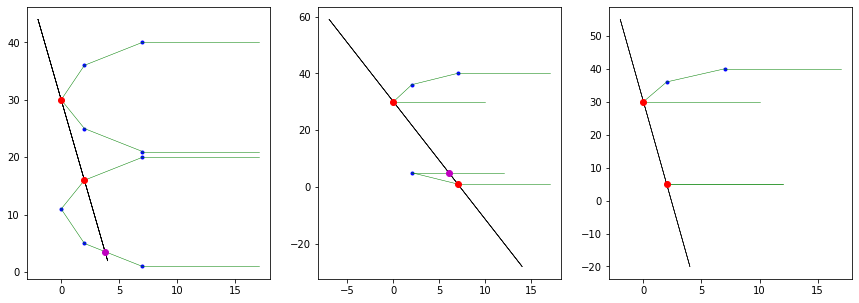

In [267]:
max = 10
#fig, (ax0, ax1, ax2) = plt.subplots(1, 3) 

fig = plt.figure(figsize=(20,5))

#axList = []
#ax = fig.add_subplot(111)
#ax = fig.add_subplot(111)
#ax.plot([1,2,3])

#points = create_points_circle(max,10)
#points = create_points_arc(max,6)
points1 = create_points_arc(max,5, 0)
points2 = create_points_arc(max,5, max*2)
#points1.extend(points2)
points = points1
for i in range(len(points2)):
    points.append(points2[i])

resultList = dynamicConvexHull(points,fig)
#plotPoints(points, Y0, showAngles=True, hull=resultList)

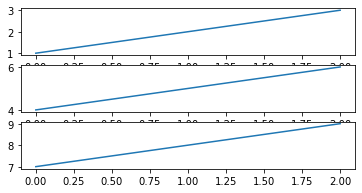

In [150]:
import matplotlib.pyplot as plt

# start with one
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1,2,3])


# now later you get a new subplot; change the geometry of the existing
n = len(fig.axes)
for i in range(n):
    fig.axes[i].change_geometry(n+1, 1, i+1)

# add the new
ax = fig.add_subplot(n+1, 1, n+1)
ax.plot([4,5,6])

ax = fig.add_subplot(n+2, 1, n+2)
ax.plot([7,8,9])

n = len(fig.axes)
for i in range(n):
    fig.axes[i].change_geometry(n+1, 1, i+1)

plt.show()

311
321
302


ValueError: Number of columns must be a positive integer, not 0

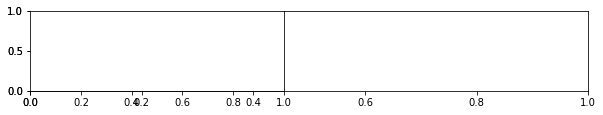

In [135]:
import matplotlib.pyplot as plt
import numpy as np

f = plt.figure(figsize=(10,5))
axList = []
row = 1
coords = 1
for i in range(1,6):
    strg = "3"
    #coords = "1"
    if(i % 3 == 0):
        coords += 1
        row += 1
    #coordStr = "{}".format(coords)
    rowStr = "{}".format(row)
    colStr = "{}".format(i%3)
    #coords += colStr
    #coords += rowStr
    #strg += coordStr
    strg += colStr
    strg += rowStr
    
    print(strg)
    axList.append(f.add_subplot(int(strg)))
#ax = f.add_subplot(121)
#ax2 = f.add_subplot(122)
x = np.linspace(0,4,1000)
for i in range(len(axList)):
    axList[i].plot(x, np.sin(x))
    axList[i].grid()
#ax
#ax2.plot(x, np.cos(x), 'r:')

In [112]:
import matplotlib.pyplot as plt
from pylab import *
import numpy as np

x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

subplots_adjust(hspace=0.000)
number_of_subplots=10

for i,v in enumerate(range(number_of_subplots)):
    v = v+1
    ax1 = subplot(1,number_of_subplots,v, xscale=10, yscale=10)
    ax1.plot(x,y)

plt.show()

AttributeError: 'int' object has no attribute 'lower'

<Figure size 432x288 with 0 Axes>